## Feed Forward Neural Network

In [37]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchinfo import summary

In [2]:
%matplotlib inline

Getting the configuration

In [3]:
if torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"

In [23]:
input_size = 784 # 28x28
hidden_size = 100
num_classes = 10 # 0 - 9
num_epochs = 2
batch_size = 32
lr = 1e-2

PyTorch has several datasets. The MNIST dataset can be found in ```torchvision.datasets.MNIST```.
All datasets are subclasses of ```torch.utils.data.Dataset``` and thus have ```__getitem__()``` and ```__len__()``` methods. and can therefore be passed to ```torch.utils.data.DataLoader```.

All datasets have a similar API. The most familiar arguments are:
- ```root```: Path where the data is to be stored. A good convention is store the data in a directory called 'data'.
- ```train```: Whether to dowload the training split. It is ```False``` by default.
- ```transform```: Transformation to be applied to data.
- ```target_transform```: Transformation to be applied to the targets.
- ```download```: To download the data if it is not available at the given root directory.

In [7]:
train_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



/home/workboots/workEnv/lib/python3.8/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Using a ```DataLoader for the data```

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

In [12]:
examples = iter(train_loader)
samples, labels = next(examples)

In [21]:
print(samples.shape, labels.shape)
print(type(samples))

torch.Size([32, 1, 28, 28]) torch.Size([32])
<class 'torch.Tensor'>


Showing images

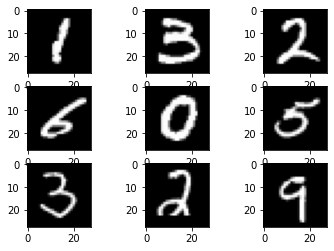

In [18]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')

plt.show()

In [19]:
class NeuralNet(nn.Module):
    def __init__(self, input_features, hidden_features, output_features):
        super(NeuralNet, self).__init__()
        self.linear1 = nn.Linear(in_features=input_features,
                                out_features=hidden_features)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(in_features=hidden_features,
                                out_features=output_features)
        
    def forward(self, x):
        result = self.linear1(x)
        result = self.relu(result)
        result = self.linear2(result)
        # Multi-class classification so usage of crossentropy 
        # thus no softmax
        return result

When creating a model, **the model must also be sent to the same device as the data i.e. to cuda or cpu**

In [32]:
model = NeuralNet(input_features=input_size,
                  hidden_features=hidden_size,
                 output_features=num_classes)
model = model.to(device)
objective = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

Training loop

In [33]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.reshape(images.shape[0],-1).to(device)
        labels = labels.to(device)
        # Forward pass
        y_pred = model(images)
        loss = objective(y_pred, labels)
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Printing
        if(i % 100 == 0):
            print(f"epoch:\t{epoch}\tbatch:\t{i}/{n_total_steps}\tloss:\t{loss.item()}")
            
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(images.shape[0], -1).to(device)
        labels = labels.to(device)
        y_pred = model(images)
        val, preds = torch.max(y_pred, dim=1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
    
    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy:{acc}")
    
        

epoch:	0	batch:	0/1875	loss:	2.333613395690918
epoch:	0	batch:	100/1875	loss:	0.45997366309165955
epoch:	0	batch:	200/1875	loss:	0.5484407544136047
epoch:	0	batch:	300/1875	loss:	0.11715091019868851
epoch:	0	batch:	400/1875	loss:	0.2009093463420868
epoch:	0	batch:	500/1875	loss:	0.19254189729690552
epoch:	0	batch:	600/1875	loss:	0.019059360027313232
epoch:	0	batch:	700/1875	loss:	0.8214685320854187
epoch:	0	batch:	800/1875	loss:	0.11934762448072433
epoch:	0	batch:	900/1875	loss:	0.23372821509838104
epoch:	0	batch:	1000/1875	loss:	0.08517943322658539
epoch:	0	batch:	1100/1875	loss:	0.011728167533874512
epoch:	0	batch:	1200/1875	loss:	0.34928950667381287
epoch:	0	batch:	1300/1875	loss:	0.44223397970199585
epoch:	0	batch:	1400/1875	loss:	0.08548911660909653
epoch:	0	batch:	1500/1875	loss:	0.19533120095729828
epoch:	0	batch:	1600/1875	loss:	0.034675855189561844
epoch:	0	batch:	1700/1875	loss:	0.1716262847185135
epoch:	0	batch:	1800/1875	loss:	0.4242292642593384
epoch:	1	batch:	0/1875	loss:

In [43]:
summary(model,
       input_size=(batch_size, 784))

Layer (type:depth-idx)                   Output Shape              Param #
NeuralNet                                --                        --
├─Linear: 1-1                            [32, 100]                 78,500
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 10]                  1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (M): 2.54
Input size (MB): 0.10
Forward/backward pass size (MB): 0.03
Params size (MB): 0.32
Estimated Total Size (MB): 0.45